In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [47]:
#Path to files from Step1
main_path = "/Volumes/RAR_HD1/RAR/Shaffer_Scope/20220310_DKK1/Cellori_clean/"
paths_to_all_pik = glob.glob(main_path+"/*.pkl")

#Name of sample names
names_crispr = ["control","plastic"]

# You need to eddit how you are getting the filename
# the code works for this file name:
# /Volumes/RAR_HD1/RAR/20220207_CRISPR/20220207_130432_697__PlateRosa_2_Well1_ChannelDAPI_Seq0000.tif
for i,name_crispr in enumerate(names_crispr):
    print(i+1,len(names_crispr))
    cnt = 0
    
    for path_crop in paths_to_all_pik:
    
        file_name = path_crop.split('200gm_')[-1][0:7]
        if name_crispr == file_name:
            print(file_name)
#  if this is working 

1 2
control
control
control
control
2 2
plastic
plastic
plastic
plastic


In [48]:
                      


colony_all_files = []
colony_hold = []
colony_name = []
for i,name_crispr in enumerate(names_crispr):
    print(i+1,len(names_crispr))
    cnt = 0
    
    for path_crop in paths_to_all_pik:
        
        file_name = path_crop.split('200gm_')[-1][0:7]
        
        
        if name_crispr == file_name:
            
            df_points = pd.read_pickle(path_crop)
            
            
            #Get all colony sizes
            for k,m in enumerate(np.unique(df_points['color'])):
                
                colony_hold.append(len(df_points.loc[df_points['color'] == m]))
                colony_name.append(file_name)
                
#     flat_list = [item for sublist in colony_hold for item in sublist]             
    colony_all_files.append(colony_hold)

1 2
2 2


In [49]:
d = {'values':colony_hold,'names':colony_name}
# Create the pandas DataFrame
df = pd.DataFrame(data=d)
 
# specifying column names
#df.columns = names_crispr
 
# print dataframe.
print(df, "\n")

     values    names
0       196  control
1        49  control
2        25  control
3        38  control
4         6  control
..      ...      ...
147       3  plastic
148     258  plastic
149     216  plastic
150     177  plastic
151     151  plastic

[152 rows x 2 columns] 



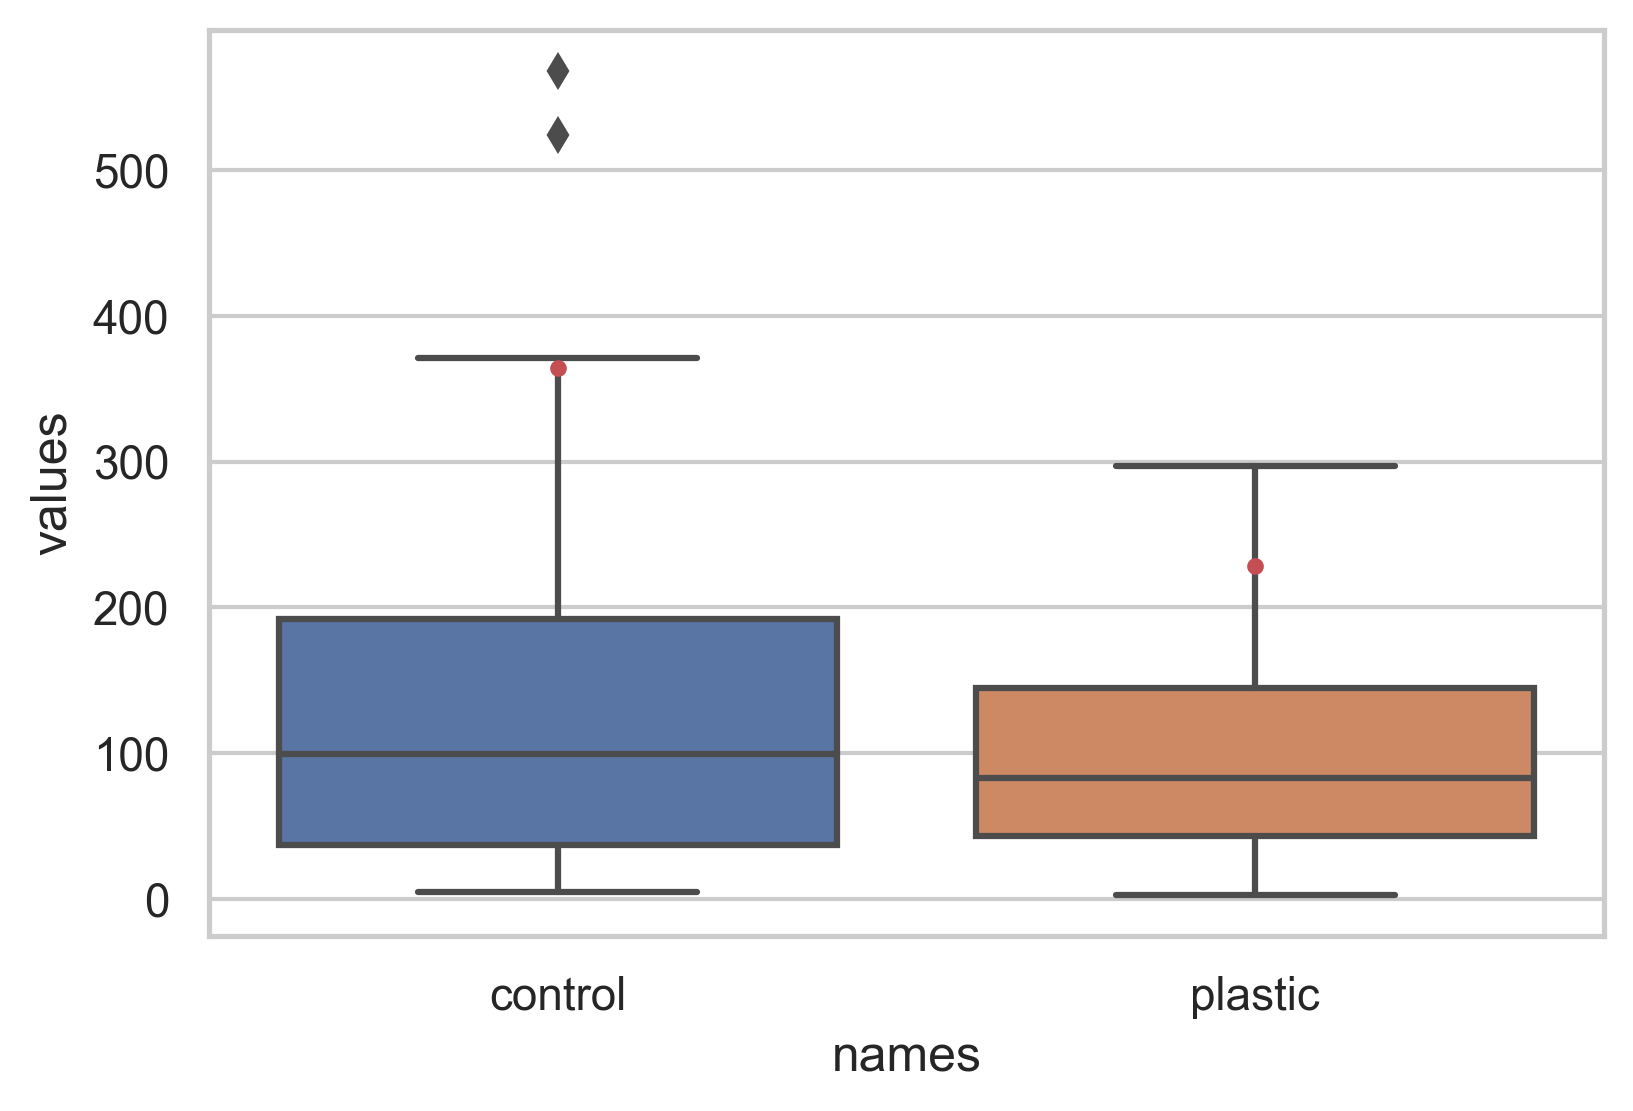

In [53]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="names", y="values", data=df)
locs=ax.get_xticks()
ax.plot(locs, percentile_95, '.r')

In [51]:
colony_all_files_norm = []
percentile_95 = []

for i,m in enumerate(names_crispr):
    a = df.loc[df['names'] == m]['values']
    per_95 = np.mean(np.percentile(a, 90))
    percentile_95.append(np.mean([ k for k in a if k > per_95 ]))
    
print(percentile_95,names_crispr)


[364.0, 228.14285714285714] ['control', 'plastic']


control
plastic


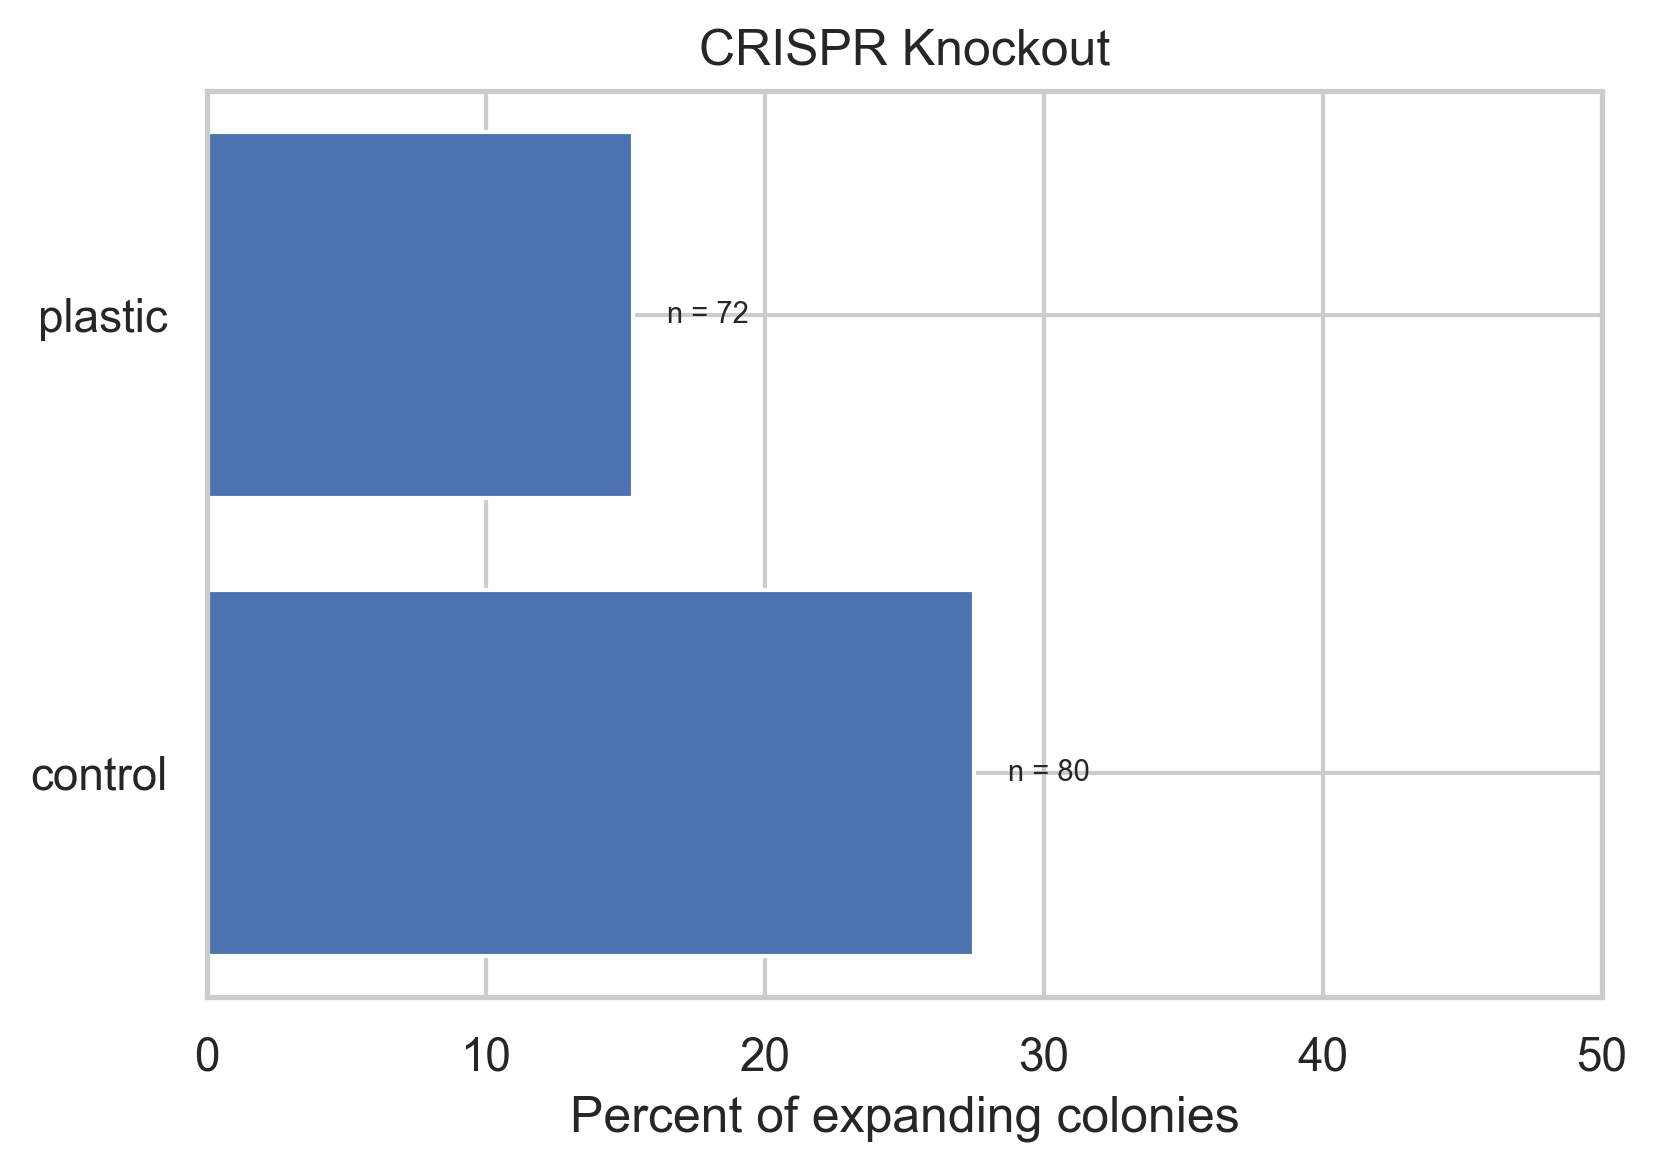

In [52]:
colony_all_files_norm = []
big_keep = []
len_colony = []

big = 

for i,m in enumerate(names_crispr):
    print(m)
    a =df.loc[df['names'] == m]['values']
    
    big_keep.append(100*len([ k for k in a if k > big ])/len(a))
    len_colony.append(len(a))

fig, ax = plt.subplots()

hbars = ax.barh(names_crispr, big_keep, align='center')

# Label with given captions, custom padding and annotate options
ax.bar_label(hbars, labels=['n = %.0f' % e for e in len_colony],
             padding=8, fontsize=7)
ax.set_xlim(right=50)
plt.title('CRISPR Knockout');
plt.xlabel('Percent of expanding colonies')
plt.show()


<AxesSubplot:xlabel='values', ylabel='Count'>

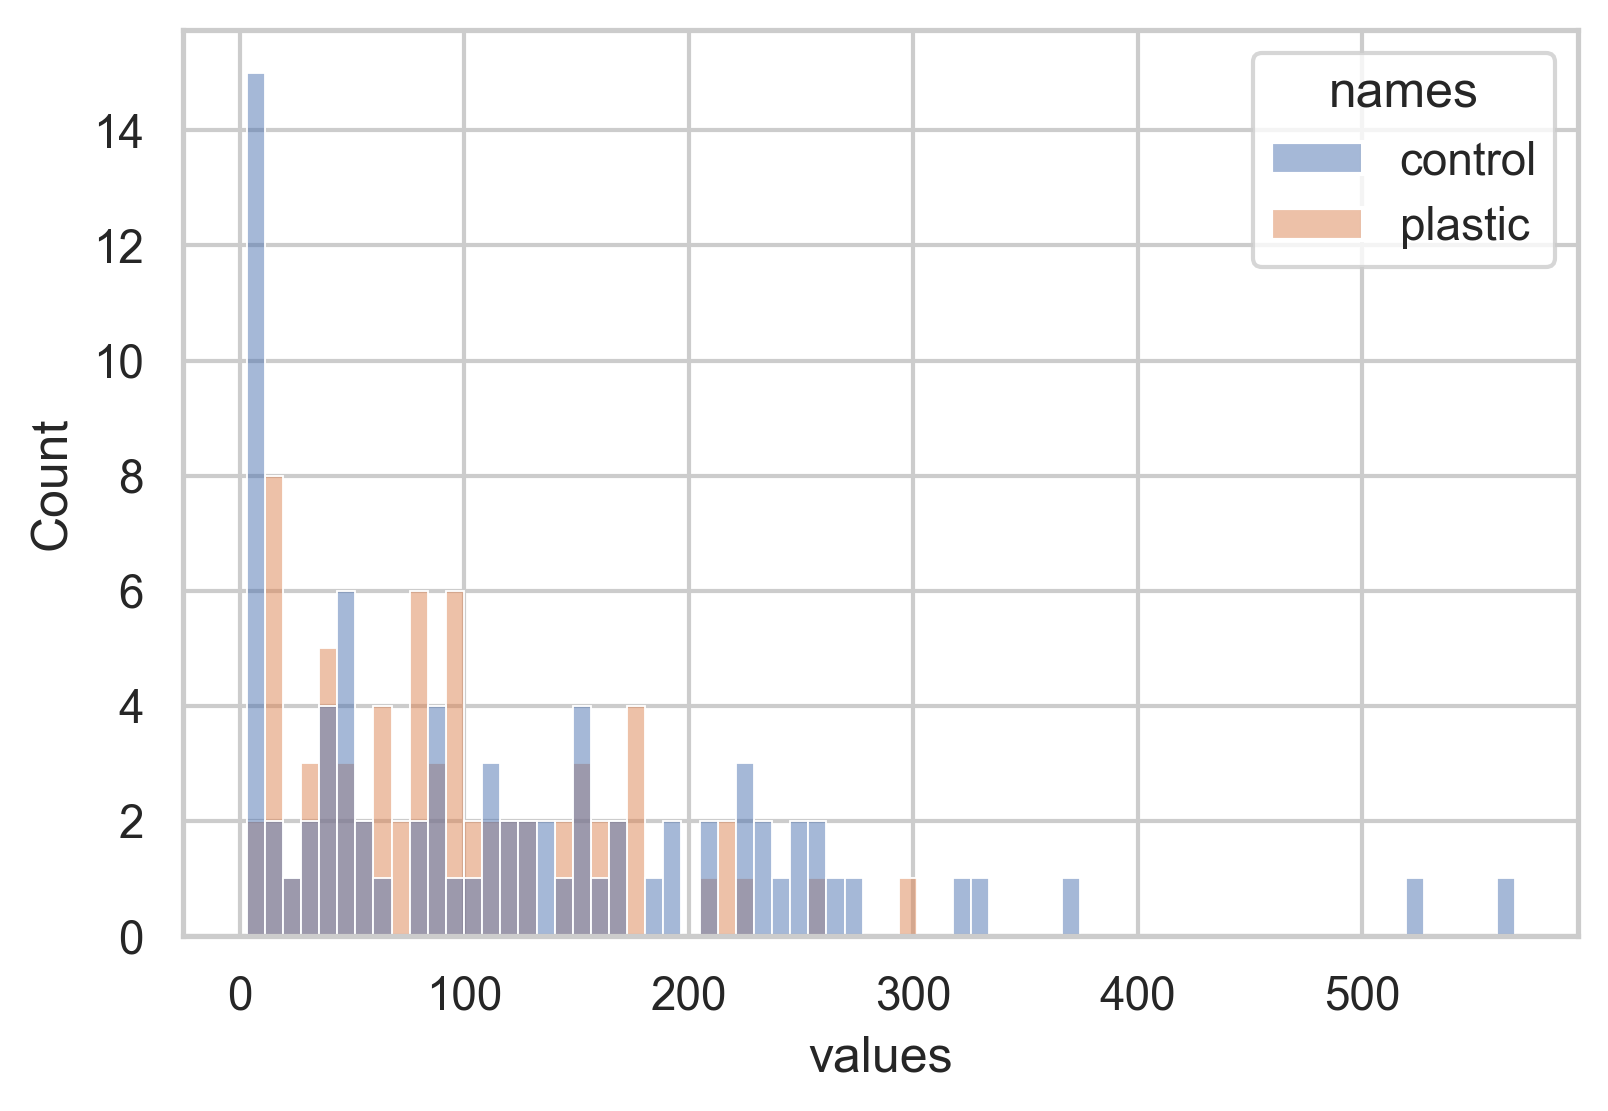

In [54]:

sns.histplot(data=df,x = 'values', hue="names", bins=70)#, element="poly")#, log_scale=True)


<AxesSubplot:xlabel='values_log2', ylabel='Count'>

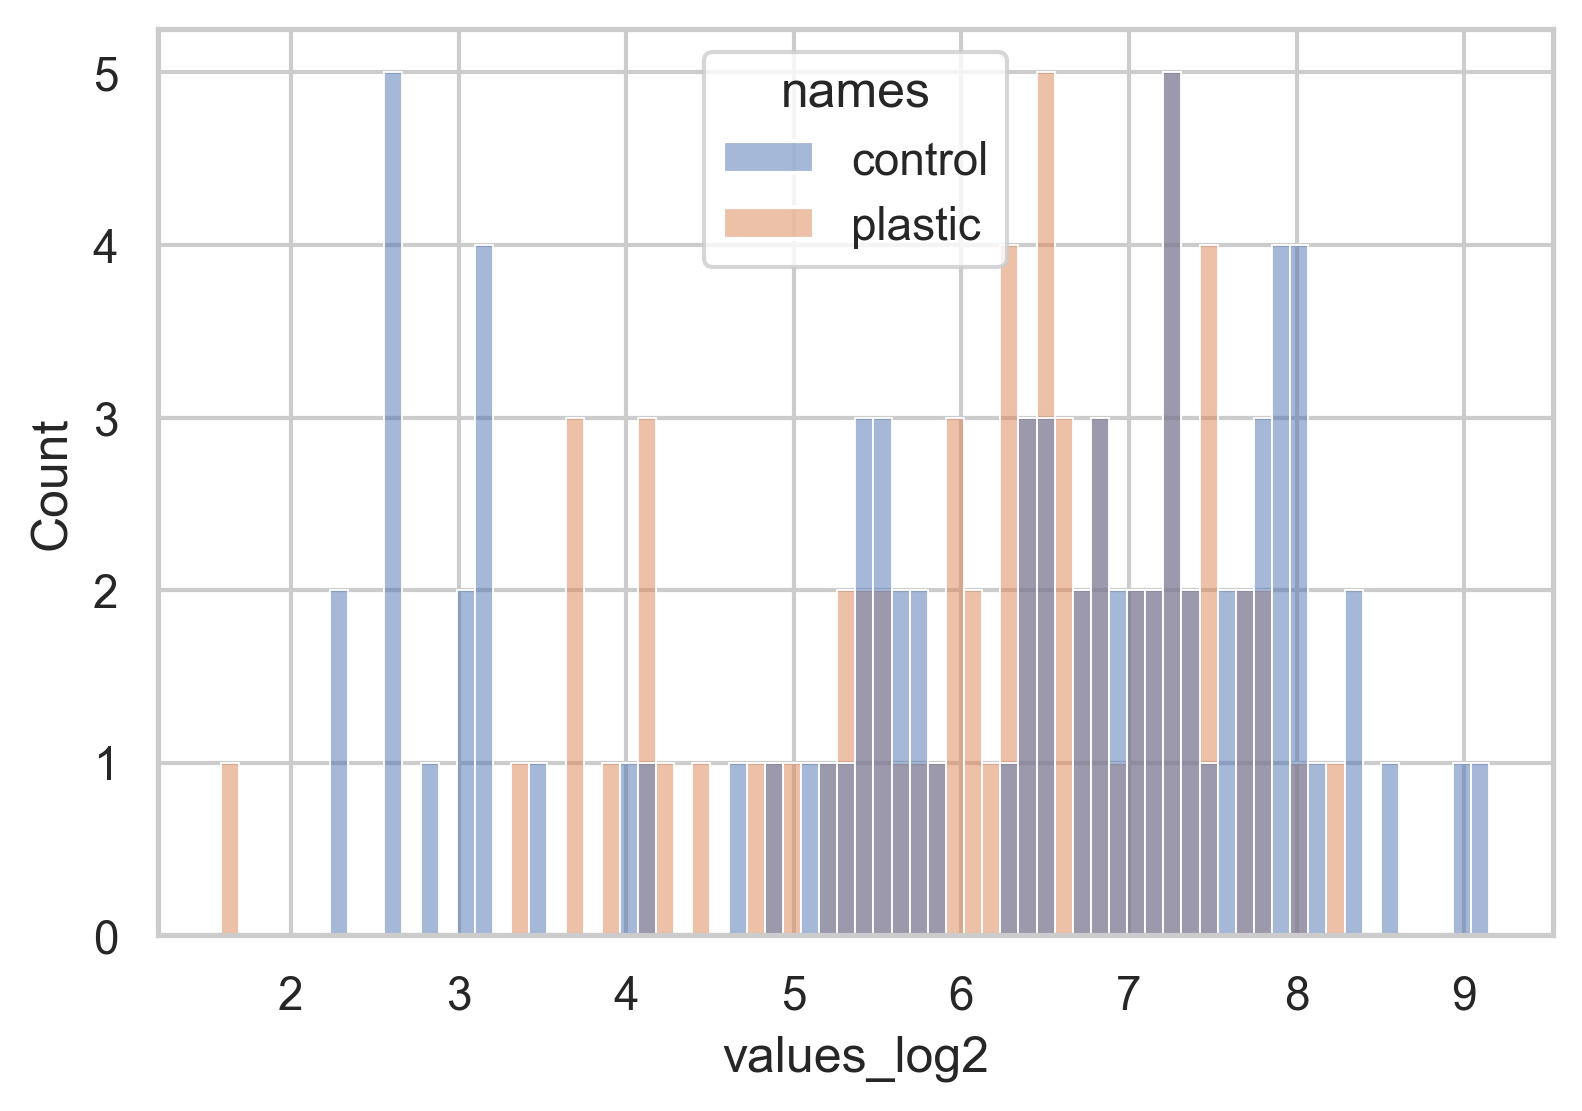

In [55]:
import math
log2_values=[]
for i in df['values']:
    log2_values.append(math.log2(i))
    
df['values_log2'] = log2_values
sns.histplot(data=df,x = 'values_log2', hue="names", bins=70)#, element="poly")#, log_scale=True)


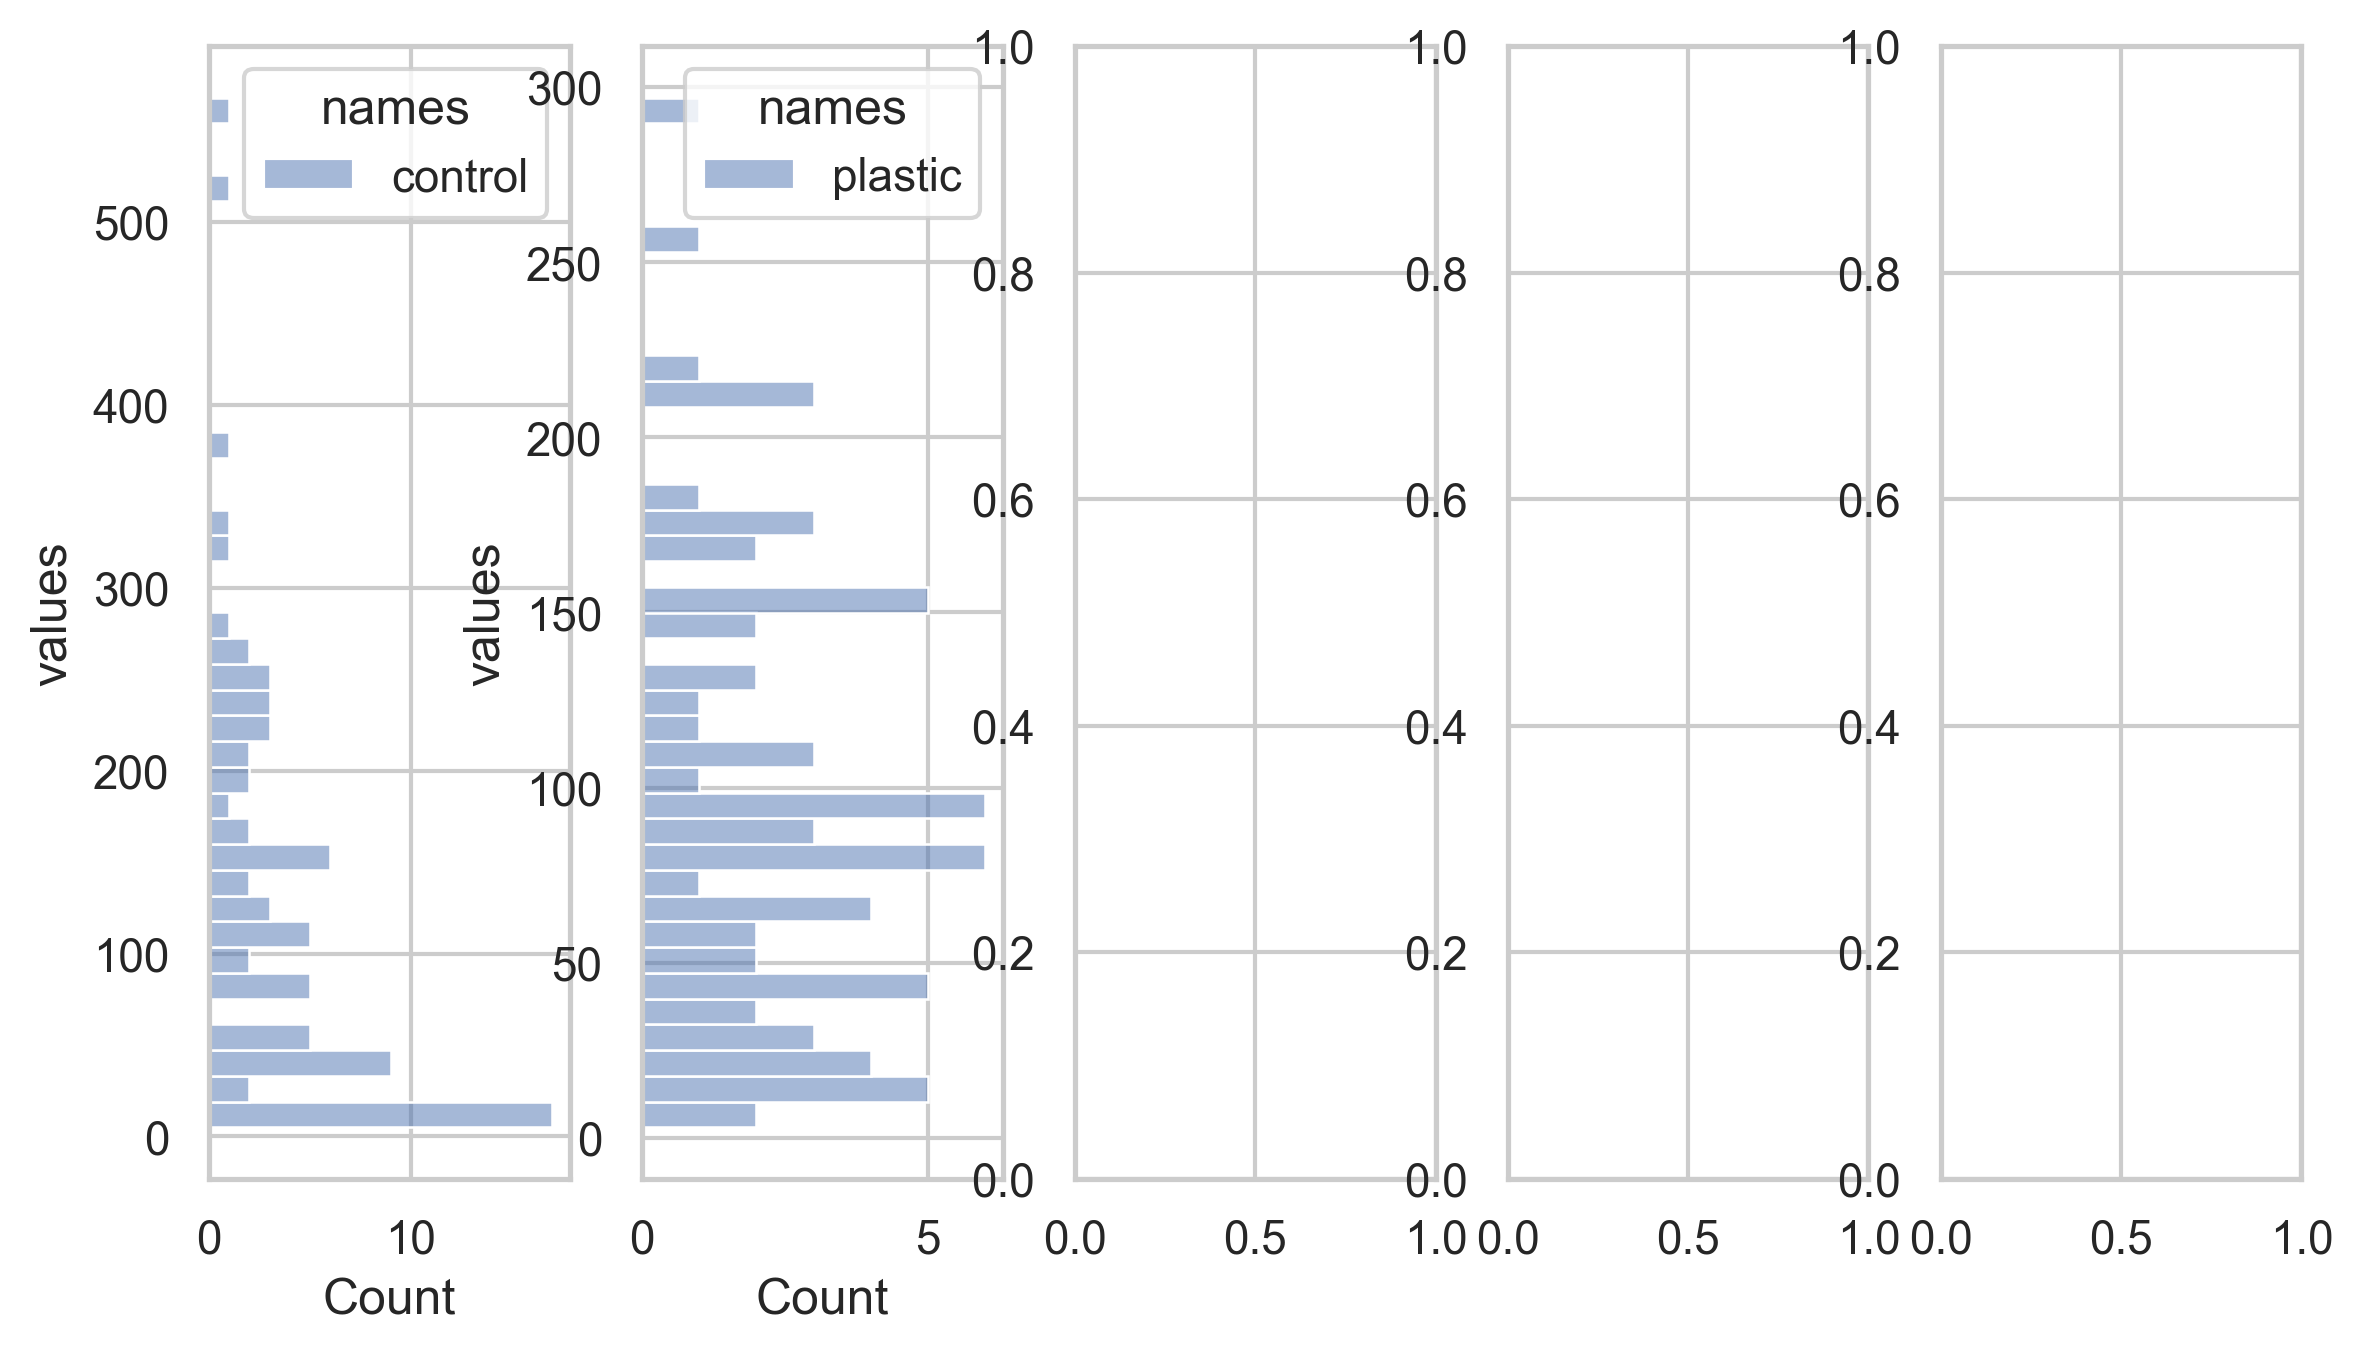

In [56]:
f, axes = plt.subplots(1, 5,figsize=(9,5))#, sharey=True)

for i, c in enumerate(names_crispr):
    sns.histplot(data=df.loc[df['names'] == c],y = 'values', hue="names", bins=40, ax=axes[i])

plt.show()

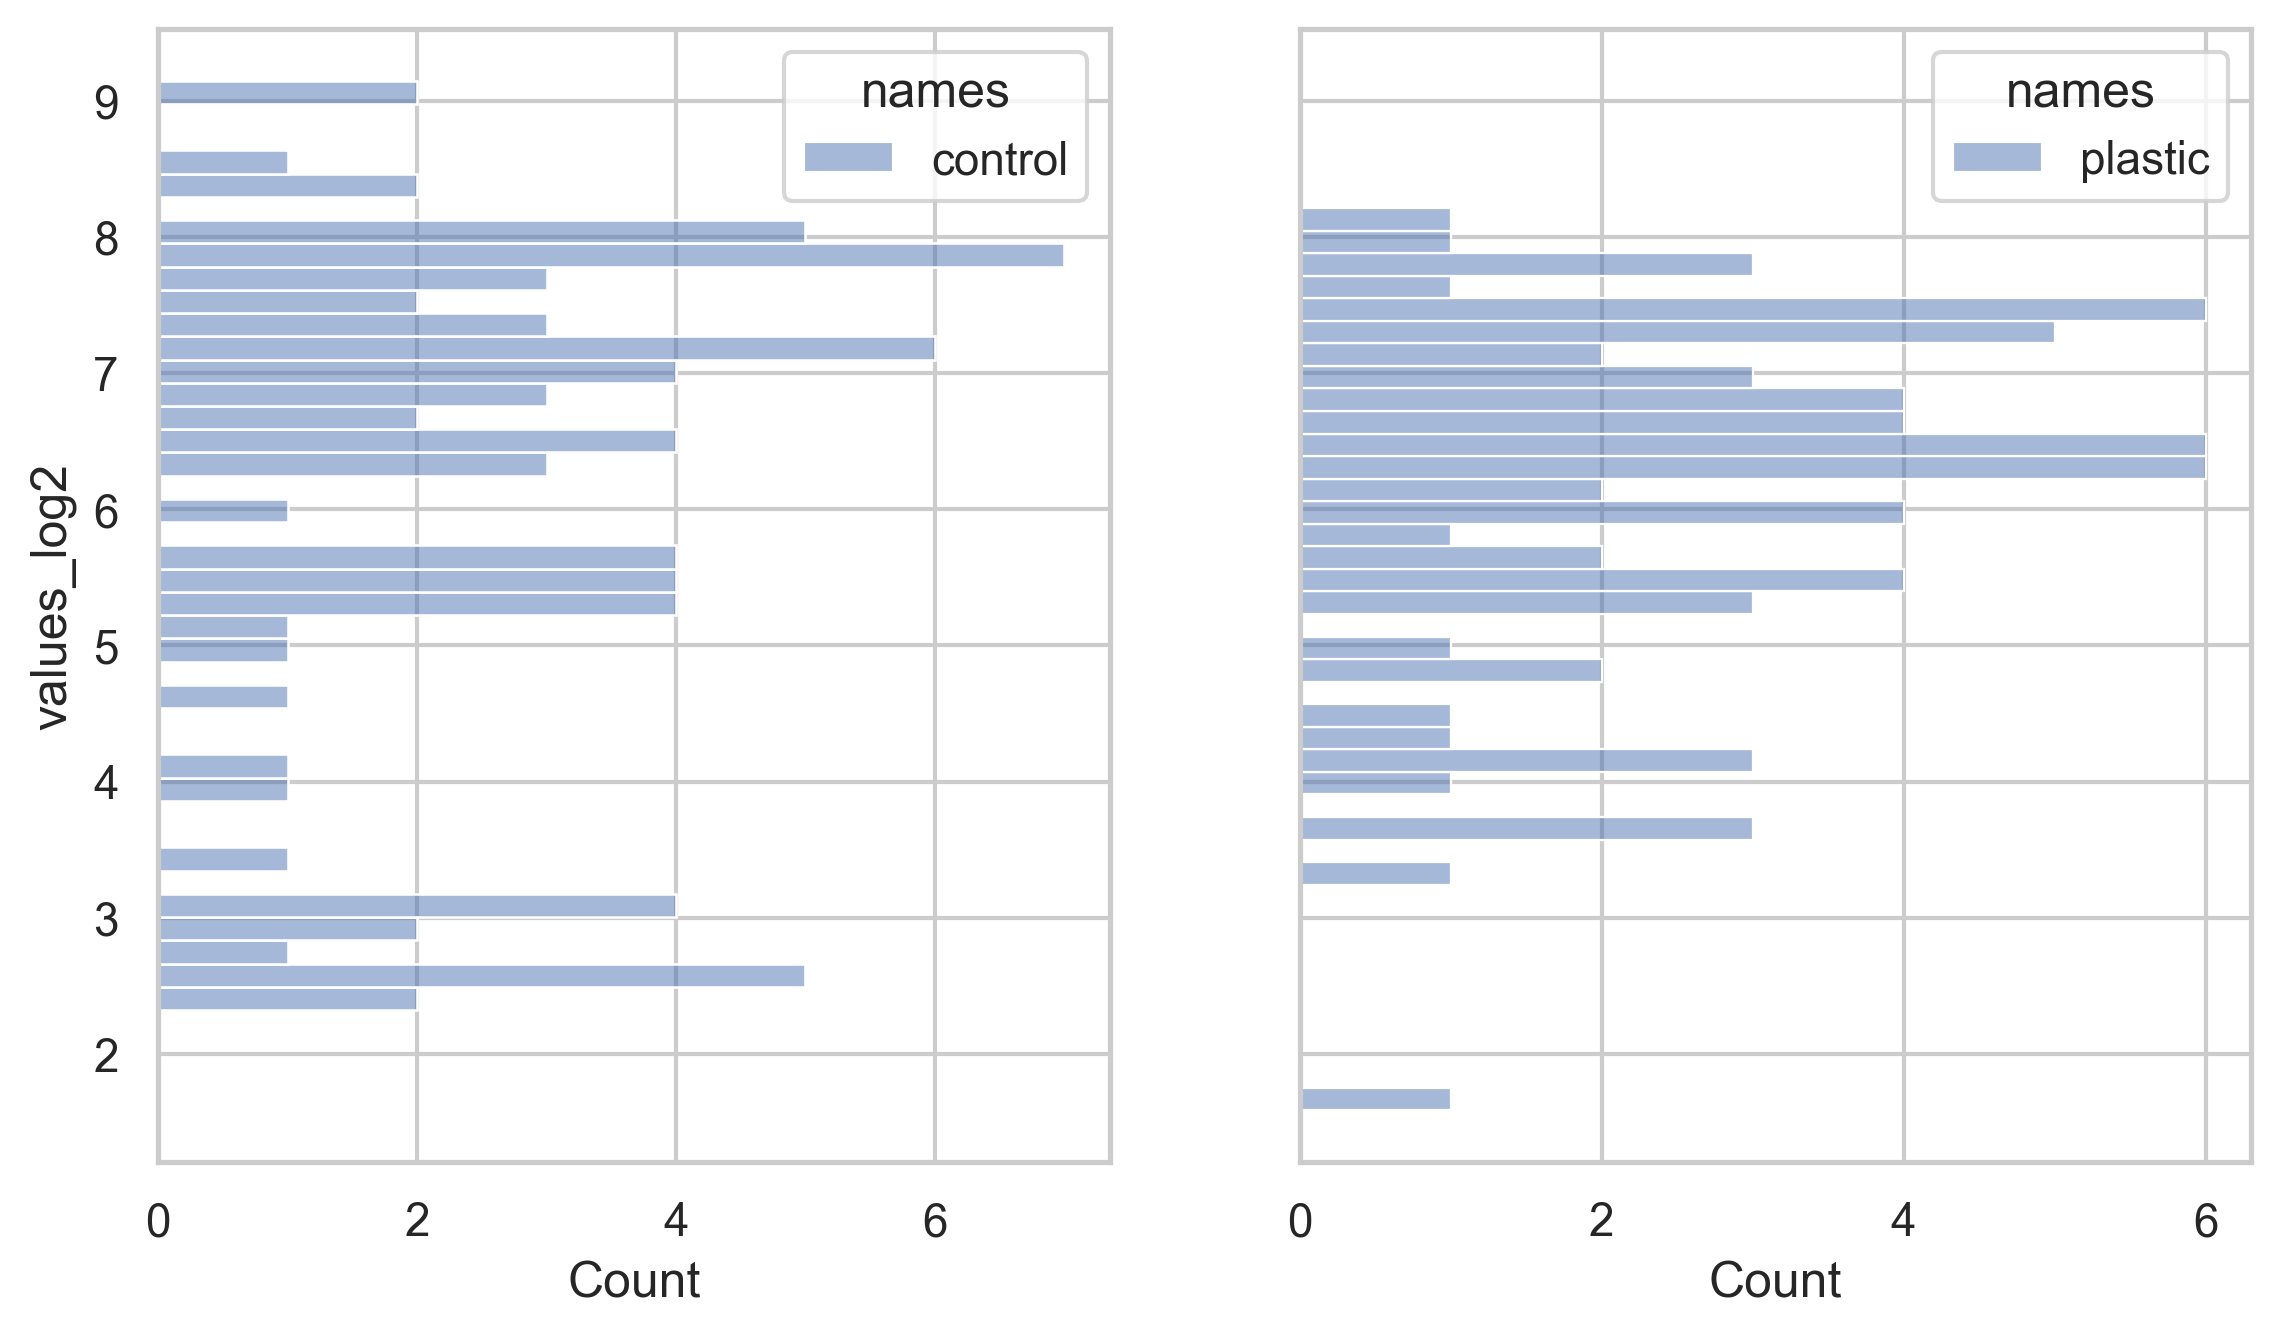

In [58]:
f, axes = plt.subplots(1, 2,figsize=(9,5), sharey=True)

for i, c in enumerate(names_crispr):
    sns.histplot(data=df.loc[df['names'] == c],y = 'values_log2', hue="names", bins=40, ax=axes[i])

plt.show()

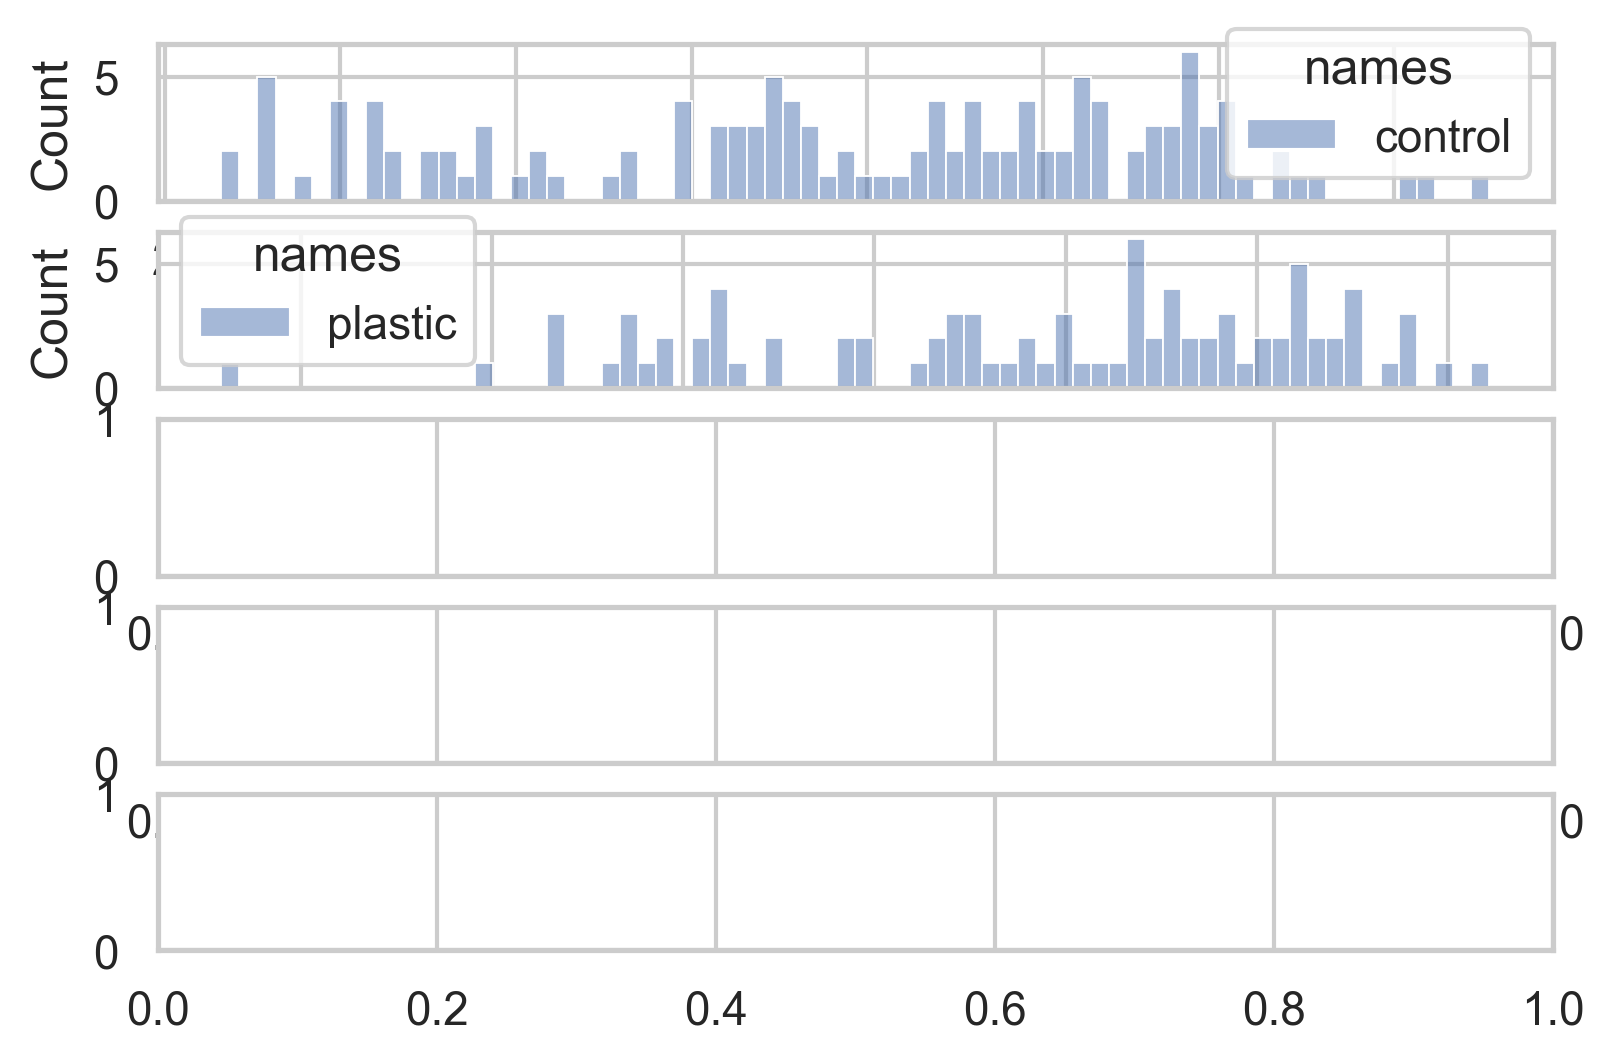

In [39]:
f, axes = plt.subplots(5, 1)#,figsize=(9,5))#, sharey=True)

for i, c in enumerate(names_crispr):
    sns.histplot(data=df.loc[df['names'] == c],x = 'values_log2', hue="names", bins=70, ax=axes[i])

plt.show()

In [63]:


import numpy as np
import pandas as pd


import scipy as sp
import scipy.spatial
from scipy.spatial.distance import cdist
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,NavigationToolbar2Tk)

import tkinter as tk
import glob
from sklearn.mixture import GaussianMixture
from matplotlib.widgets import LassoSelector
from matplotlib.path import Path
import os


d = {'x':[1,2,3,4],'y':[5,6,7,8]}
data = pd.DataFrame(data=d)

X = data.to_numpy()

# User input
nearest_n  = int(entry_neighbor.get())#7 # how many neighboring cells to calculate distance
threshhold = 1*10**int(entry_ucl.get())#6 # squared sum ucledean distance

plt.scatter(X[:,0], X[:,1],s=1)

points = X
distances = sp.spatial.distance.cdist(points,points)

# An element is not its own nearest neighbor
np.fill_diagonal(distances, np.inf)

# Find the index of each element's nearest neighbor
mins = distances.argmin(0)

idx = np.argpartition(distances, kth=nearest_n, axis=-1)
distances_hold = np.take_along_axis(distances, idx, axis=-1)
distances_hold = distances_hold[:,:nearest_n]
dense_points = points[np.sum(distances_hold**2, axis=1)<threshhold]


X = dense_points
















NameError: name 'entry_neighbor' is not defined

In [65]:
import pyqtgraph as pg
import numpy as np

class DrawingImage(pg.ImageItem):
    def mouseClickEvent(self, event):
        print("Click", event.pos())

    def mouseDragEvent(self, event):
        if event.isStart():
            print("Start drag", event.pos())
        elif event.isFinish():
            print("Stop drag", event.pos())
        else:
            print("Drag", event.pos())

    def hoverEvent(self, event):
        if not event.isExit():
            # the mouse is hovering over the image; make sure no other items
            # will receive left click/drag events from here.
            event.acceptDrags(pg.QtCore.Qt.LeftButton)
            event.acceptClicks(pg.QtCore.Qt.LeftButton)


img = DrawingImage(np.random.normal(size=(100, 150)), axisOrder='row-major')
view = pg.plot()
view.addItem(img)
view.show()